## Q1. 

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

Opening the datasets

In [2]:
d_26 = pd.read_csv("2006.csv")
d_27 = pd.read_csv("2007.csv")

Finding Column Names

In [3]:
d_26.columns


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Getting an understanding of the dataset

In [4]:
d_27.info

<bound method DataFrame.info of          Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2007      1           1          1   1232.0        1225   1341.0   
1        2007      1           1          1   1918.0        1905   2043.0   
2        2007      1           1          1   2206.0        2130   2334.0   
3        2007      1           1          1   1230.0        1200   1356.0   
4        2007      1           1          1    831.0         830    957.0   
...       ...    ...         ...        ...      ...         ...      ...   
7453210  2007     12          15          6   1558.0        1605   1749.0   
7453211  2007     12          15          6   1902.0        1851   2110.0   
7453212  2007     12          15          6   1024.0        1025   1750.0   
7453213  2007     12          15          6   1353.0        1315   1658.0   
7453214  2007     12          15          6   1824.0        1800   2001.0   

         CRSArrTime UniqueCarrier  FlightNu

Filtering the required columns to answer the question

In [5]:
data_26 = d_26[['Year','Month','DayofMonth','DayOfWeek','ArrTime','DepTime','DepDelay','ArrDelay']]
data_27 = d_27[['Year','Month','DayofMonth','DayOfWeek','ArrTime','DepTime','DepDelay','ArrDelay']]

Combining the two datasets and getting the first 10 rows

In [6]:
flight_delay = pd.concat([data_26, data_27])
flight_delay.head(10)

,Year,Month,DayofMonth,DayOfWeek,ArrTime,DepTime,DepDelay,ArrDelay
0,2006,1,11,3,1024.0,743.0,-2.0,6.0
1,2006,1,11,3,1313.0,1053.0,0.0,-5.0
2,2006,1,11,3,2110.0,1915.0,0.0,-23.0
3,2006,1,11,3,1925.0,1753.0,-2.0,-8.0
4,2006,1,11,3,1015.0,824.0,-8.0,0.0
5,2006,1,11,3,834.0,627.0,-3.0,2.0
6,2006,1,11,3,1041.0,825.0,5.0,20.0
7,2006,1,11,3,1155.0,942.0,-3.0,7.0
8,2006,1,11,3,1438.0,1239.0,-6.0,-7.0
9,2006,1,11,3,1841.0,1642.0,-3.0,-4.0


Transforming the ArrivalTime column into hour format as a new column called 'ArrivalTime'

In [7]:
flight_delay.insert(loc=6,column='ArrivalTime',
          value=flight_delay[['ArrTime']]/100)


Removing the 'ArrTime'column as we have the transformed version of it as another column

In [8]:
flight_delay.drop('ArrTime',inplace=True,axis=1)

Dropping the null values

In [9]:
flight_delay.dropna

<bound method DataFrame.dropna of          Year  Month  DayofMonth  DayOfWeek  DepTime  ArrivalTime  DepDelay  \
0        2006      1          11          3    743.0        10.24      -2.0   
1        2006      1          11          3   1053.0        13.13       0.0   
2        2006      1          11          3   1915.0        21.10       0.0   
3        2006      1          11          3   1753.0        19.25      -2.0   
4        2006      1          11          3    824.0        10.15      -8.0   
...       ...    ...         ...        ...      ...          ...       ...   
7453210  2007     12          15          6   1558.0        17.49      -7.0   
7453211  2007     12          15          6   1902.0        21.10      11.0   
7453212  2007     12          15          6   1024.0        17.50      -1.0   
7453213  2007     12          15          6   1353.0        16.58      38.0   
7453214  2007     12          15          6   1824.0        20.01      24.0   

         ArrDelay

As there are Arrival Times greater than 24.00 which is of no value, filtering only the rows which the Arrival Time is less than 24.00 

In [10]:
new_flight_delay = flight_delay[(flight_delay['ArrivalTime']<=24.00)]

## Best time of the day?

Filtering Arrival Time and ArrDelay columns

In [11]:
hour1 = new_flight_delay[['ArrivalTime','ArrDelay']] 
hour1

,ArrivalTime,ArrDelay
0,10.24,6.0
1,13.13,-5.0
2,21.10,-23.0
3,19.25,-8.0
4,10.15,0.0
...,...,...
7453210,17.49,13.0
7453211,21.10,5.0
7453212,17.50,15.0
7453213,16.58,36.0


Understanding the object types

In [12]:
hour1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14275427 entries, 0 to 7453214
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ArrivalTime  float64
 1   ArrDelay     float64
dtypes: float64(2)
memory usage: 326.7 MB


Creating a new column which has transformed the hours of day into four time slot bins.

In [13]:
ArrTimezone = pd.cut(hour1['ArrivalTime'], bins=[0.00,6.00,12.00,18.00,23.59], include_lowest=True, labels=['Early Morning','Morning','Afternoon','Evening'])


In [14]:
hour1['ArrTimezone'] =ArrTimezone.values




C:\Users\haysh\AppData\Local\Temp\ipykernel_24756\2679659137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hour1['ArrTimezone'] =ArrTimezone.values


In [15]:
hour1


,ArrivalTime,ArrDelay,ArrTimezone
0,10.24,6.0,Morning
1,13.13,-5.0,Afternoon
2,21.10,-23.0,Evening
3,19.25,-8.0,Evening
4,10.15,0.0,Morning
...,...,...,...
7453210,17.49,13.0,Afternoon
7453211,21.10,5.0,Evening
7453212,17.50,15.0,Afternoon
7453213,16.58,36.0,Afternoon


Filtering the required columns

In [16]:
a =hour1[['ArrDelay','ArrTimezone']]
a

,ArrDelay,ArrTimezone
0,6.0,Morning
1,-5.0,Afternoon
2,-23.0,Evening
3,-8.0,Evening
4,0.0,Morning
...,...,...
7453210,13.0,Afternoon
7453211,5.0,Evening
7453212,15.0,Afternoon
7453213,36.0,Afternoon


Grouping the Arrival delays by Timezone bins and obtaining the mean

In [17]:
from matplotlib import pyplot
import seaborn

In [18]:
a_1= a.groupby(['ArrTimezone'])['ArrDelay'].mean().reset_index()
a_1

,ArrTimezone,ArrDelay
0,Early Morning,54.174081
1,Morning,-0.020887
2,Afternoon,6.710145
3,Evening,17.089028


<AxesSubplot:ylabel='ArrDelay'>

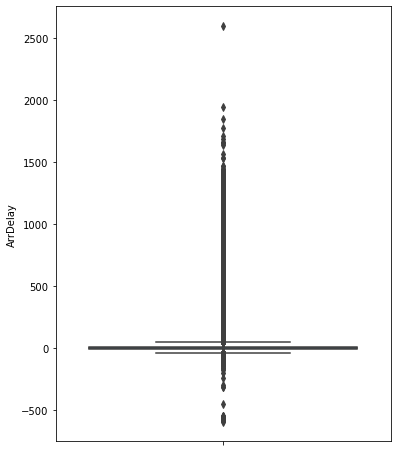

In [19]:
fig, ax = pyplot.subplots(figsize =(6,8))
sns.boxplot( ax = ax, y = hour1["ArrDelay"] )


Plotting the findings

In [20]:
a_2= a.groupby(['ArrTimezone'])['ArrDelay'].median().reset_index()
a_2

,ArrTimezone,ArrDelay
0,Early Morning,20.0
1,Morning,-4.0
2,Afternoon,-1.0
3,Evening,3.0


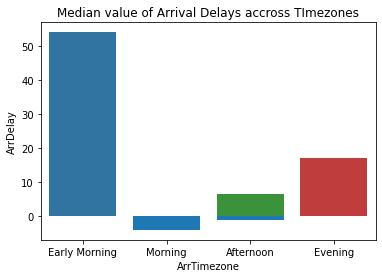

In [21]:
fig, ax = plt.subplots()
rects1 = ax.bar(a_2['ArrTimezone'],a_2['ArrDelay'])
ax.set(ylabel = "Median delay ")
ax.set_xlabel('Time Zone')
ax.set_title('Median value of Arrival Delays accross TImezones')
sns.barplot(x = 'ArrTimezone', y = 'ArrDelay', data =a_1 )
# Show the plot
plt.show()

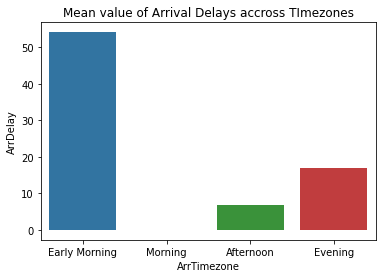

In [22]:
fig, ax = plt.subplots()
rects1 = ax.bar(a_1['ArrTimezone'],a_1['ArrDelay'])
ax.set(ylabel = "Mean delay ")
ax.set_xlabel('Time Zone')
ax.set_title('Mean value of Arrival Delays accross TImezones')
sns.barplot(x = 'ArrTimezone', y = 'ArrDelay', data =a_1 )
# Show the plot
plt.show()

According to the diagram, 'Morning' is the best time zone to minimise Arrival Delays

## Best day of the week?

Filtering ArrDelay, DayofWeek columns

In [23]:
c =new_flight_delay[['ArrDelay','DayOfWeek']]  

Grouping the Arrival delays by DayofWeek and obtaining the mean

In [24]:
c_1 =c.groupby(['DayOfWeek'])['ArrDelay'].mean().reset_index()
c_1

,DayOfWeek,ArrDelay
0,1,9.677089
1,2,7.235321
2,3,8.967936
3,4,12.113491
4,5,12.681384
5,6,5.504282
6,7,9.220803


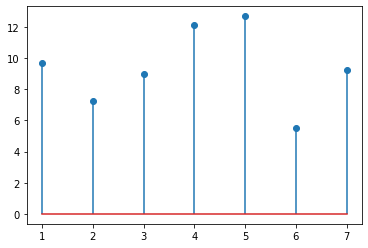

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.stem(c_1['DayOfWeek'],c_1['ArrDelay'], use_line_collection = True)
plt.show()

In [26]:
c_2= c.groupby(['DayOfWeek'])['ArrDelay'].median().reset_index()
c_2

,DayOfWeek,ArrDelay
0,1,-1.0
1,2,-2.0
2,3,-1.0
3,4,1.0
4,5,1.0
5,6,-3.0
6,7,-1.0


Therefore the best day of week is Saturday

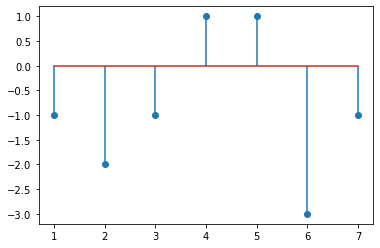

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.stem(c_2['DayOfWeek'],c_2['ArrDelay'], use_line_collection = True)
plt.show()

In [28]:
d =new_flight_delay[['ArrDelay','Month']]  

In [29]:
d_1 =d.groupby(['Month'])['ArrDelay'].mean().reset_index()
d_1

,Month,ArrDelay
0,1,7.430878
1,2,10.487408
2,3,9.017843
3,4,7.478379
4,5,6.953790
5,6,14.115177
6,7,12.706658
7,8,10.608841
8,9,5.997944
9,10,8.536068


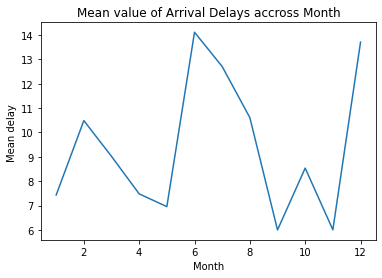

In [30]:
fig, ax = plt.subplots()

ax.set(ylabel = "Mean delay ")
ax.set_xlabel('Month')
ax.set_title('Mean value of Arrival Delays accross Month')
sns.lineplot(x = d_1['Month'],y =d_1['ArrDelay'], data =d_1 )
# Show the plot
plt.show()

In [32]:
d_2 =d.groupby(['Month'])['ArrDelay'].median().reset_index()
d_2

,Month,ArrDelay
0,1,-2.0
1,2,0.0
2,3,-1.0
3,4,-1.0
4,5,-2.0
5,6,1.0
6,7,0.0
7,8,0.0
8,9,-3.0
9,10,-1.0


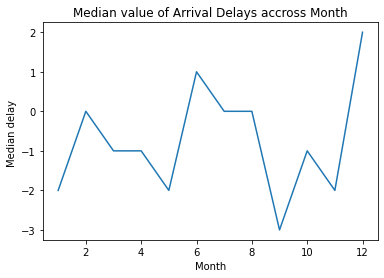

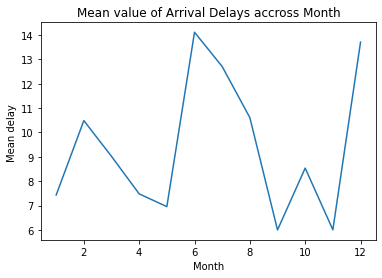

In [34]:
fig, ax = plt.subplots()

ax.set(ylabel = "Median delay ")
ax.set_xlabel('Month')
ax.set_title('Median value of Arrival Delays accross Month')
sns.lineplot(x = d_2['Month'],y =d_2['ArrDelay'], data =d_1 )
# Show the plot
plt.show()

fig, ax = plt.subplots()

ax.set(ylabel = "Mean delay ")
ax.set_xlabel('Month')
ax.set_title('Mean value of Arrival Delays accross Month')
sns.lineplot(x = d_1['Month'],y =d_1['ArrDelay'], data =d_1 )
# Show the plot
plt.show()